<a href="https://colab.research.google.com/github/Toshi-M56/matplotlib_lecture/blob/main/%E5%B7%A5%E5%AD%A6%E5%AE%9F%E9%A8%93PID%E5%88%B6%E5%BE%A1%E5%AE%9F%E9%A8%93%E3%82%B7%E3%83%9F%E3%83%A5%E3%83%AC%E3%83%BC%E3%82%B7%E3%83%A7%E3%83%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control
!pip install japanize_matplotlib

     |████████████████████████████████| 339 kB 5.2 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=044034baaec01a21f68b851f0fff403cc94d20607aeb03106142fb58af476c93
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control
     |████████████████████████████████| 4.1 MB 5.1 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=c85d1ecd7adfeda59c17ee2916b5af6791726af6ee07485275612a9c36fb9776
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
import japanize_matplotlib
plt.style.use('bmh')

In [ ]:
Kp = 1.0

G = matlab.tf([7*Kp], [1, 0, 7*Kp])
print(G)


   7
-------
s^2 + 7



In [ ]:
def plot_step_response(G, control="P", time=5, n_step=1000):
    t = np.linspace(0, time, n_step)
    yout, T = matlab.step(G, t)
    d_yout = (yout[1:] - yout[:-1])/(time/n_step)
    if control=="P":
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(211)
        ax2 = fig.add_subplot(212)
    elif control=="PD":
        fig = plt.figure(figsize=(6,9))
        ax = fig.add_subplot(311)
    ax.plot(T, yout, label="位置")
    # ax.plot(T[1:], d_yout, label="速度")
    ax.legend()
    ax.axhline(1, color="r", linestyle="--")
    ax.set_xlabel("時間[s]", fontsize=20)
    ax.set_ylabel("制御量", fontsize=20)
    ax.set_ylabel("制御量", fontsize=20)
    plt.show()


   7
-------
s^2 + 7



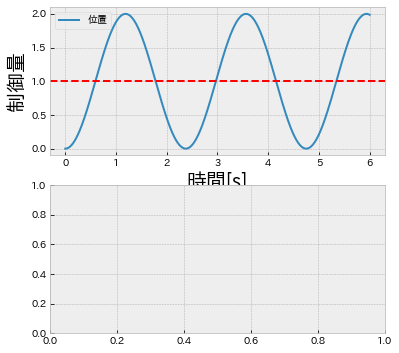

In [ ]:
Kp = 1.0
G = matlab.tf([7*Kp], [1, 0, 7*Kp])
print(G)

plot_step_response(G, control="P", time=6)


   0.7 s
-----------
s^2 + 0.7 s



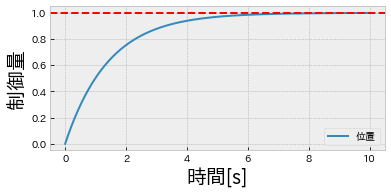

In [ ]:
Kp = 0.0
Kd = 0.1
G = matlab.tf([7*Kd, 7*Kp], [1, 7*Kd, 7*Kp])
print(G)

plot_step_response(G, control="PD", time=10)

In [ ]:
def function(t, Kp, Kd):
    D = 12.25*Kd**2 - 7*Kp
    if D > 0:
        beta = np.sqrt(12.25*Kd**2 - 7*Kp)
        print(Kp, Kd, beta)
        p1 = -3.5*Kd + beta
        p2 = -3.5*Kd - beta
        return 1 - (1 / (2*beta))* (p1*np.exp(p1*t) - p2*np.exp(p2*t))
    elif D < 0:
        omega = np.sqrt(-12.25*Kd**2 + 7*Kp)
        return 1 - np.exp(-3.5*Kd*t) * (np.cos(omega*t) - (3.5*Kd/omega)*np.sin(omega*t))

0.0 0.1 0.35000000000000003


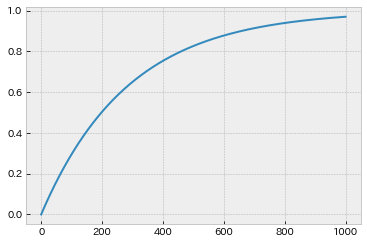

In [ ]:
Kp = 0.0
Kd = 0.1
t = np.linspace(0, 5, 1000)
yout = function(t, Kp, Kd)
plt.plot(yout)